c:\Users\jacqu\anaconda3\envs\datascience\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (unknown location)

Falling back to a static output.
  warnings.warn(


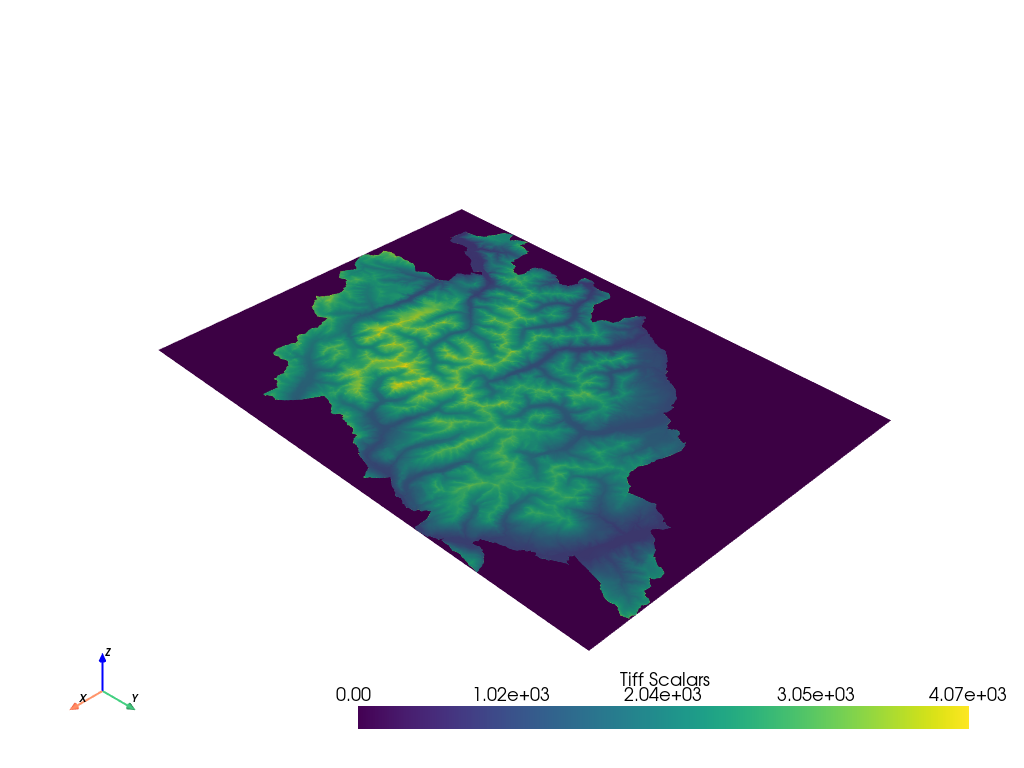

In [1]:
import pyvista as pv
import numpy as np
import rasterio
import gemgis as gg
import numpy as np
import open3d as o3d
np.bool = np.bool_


reader = pv.get_reader("../GEODATA/pne_emprise.tif")
mesh = reader.read()
mesh.plot()

In [3]:


dem = rasterio.open("../GEODATA/pne_emprise.tif")

dem.read(1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
list(dem.bounds)

[929787.5, 6378362.5, 985812.5, 6456737.5]

In [23]:
grid = gg.visualization.create_dem_3d(dem=np.flipud(dem.read(1)*0.08), extent=[0,dem.shape[1],0,dem.shape[0]])

c:\Users\jacqu\anaconda3\envs\datascience\lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [29]:
grid.extract_geometry().save('mesh.stl')

c:\Users\jacqu\anaconda3\envs\datascience\lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (unknown location)

Falling back to a static output.
  warnings.warn(


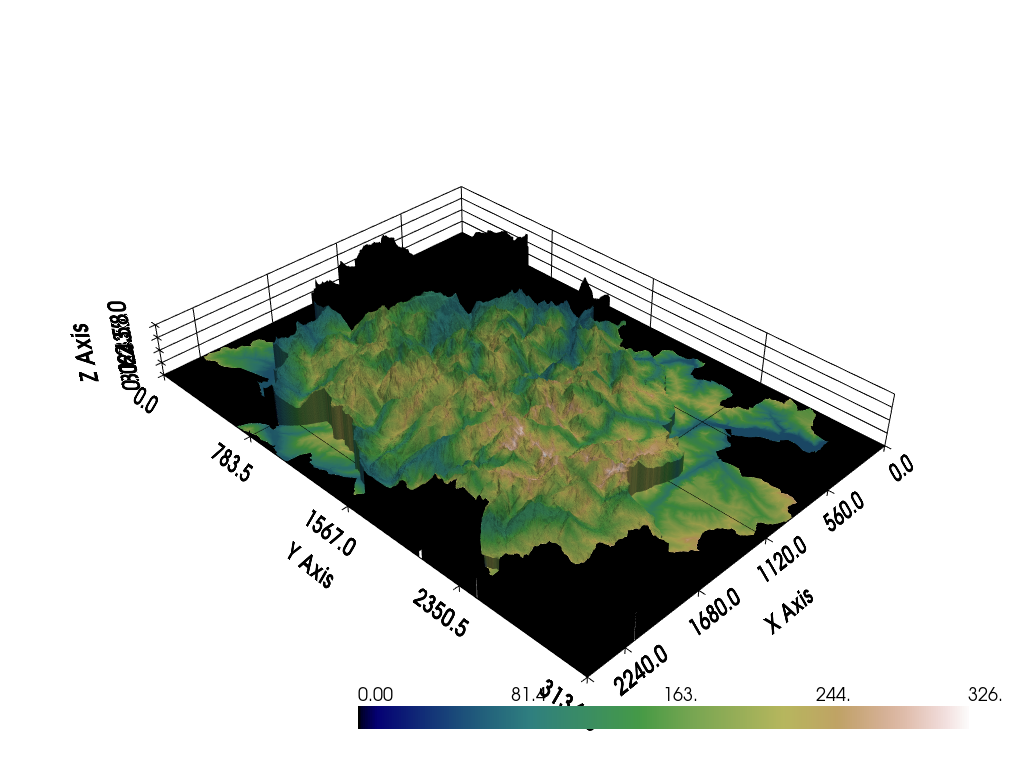

In [18]:
p = pv.Plotter()

p.add_mesh(mesh=grid, scalars=grid["Elevation [m]"], cmap='gist_earth')

p.show_grid(color='black')
p.set_background(color='white')
p.show()

In [52]:


mesh = o3d.t.geometry.TriangleMesh.create_text('Open3D', depth=1).to_legacy()
mesh = o3d.geometry.TriangleMesh.compute_triangle_normals(mesh)
#o3d.visualization.draw([{'name': 'text', 'geometry': mesh}])
o3d.io.write_triangle_mesh("mesh.stl", mesh) #oh yeah !!!!
#https://github.com/isl-org/Open3D/issues/2012

True

In [ ]:
#https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/10_visualizing_data_with_pyvista.html#Visualizing-the-DEM-with-PyVista
#https://docs.pyvista.org/version/stable/api/readers/_autosummary/pyvista.TIFFReader.html#pyvista.TIFFReader
#https://docs.pyvista.org/version/stable/examples/01-filter/boolean-operations.html